## Install and import dependencies

In [1]:
!pip install git+https://github.com/haotian-liu/LLaVA.git@786aa6a19ea10edc6f574ad2e16276974e9aaa3a

  Cloning https://github.com/haotian-liu/LLaVA.git (to revision 786aa6a19ea10edc6f574ad2e16276974e9aaa3a) to /tmp/pip-req-build-jil4fmwz
  Running command git clone --filter=blob:none --quiet https://github.com/haotian-liu/LLaVA.git /tmp/pip-req-build-jil4fmwz
  Running command git rev-parse -q --verify 'sha^786aa6a19ea10edc6f574ad2e16276974e9aaa3a'
  Running command git fetch -q https://github.com/haotian-liu/LLaVA.git 786aa6a19ea10edc6f574ad2e16276974e9aaa3a
  Running command git checkout -q 786aa6a19ea10edc6f574ad2e16276974e9aaa3a
  Resolved https://github.com/haotian-liu/LLaVA.git to commit 786aa6a19ea10edc6f574ad2e16276974e9aaa3a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 6.2 M

In [8]:
!pip install retina-face


  Using cached retina_face-0.0.17-py3-none-any.whl (25 kB)


In [9]:
from retinaface import RetinaFace

In [10]:
# @title Download the data

import os, requests, tarfile

fnames = ["kay_labels.npy", "kay_labels_val.npy", "kay_images.npz"]
urls = ["https://osf.io/r638s/download",
        "https://osf.io/yqb3e/download",
        "https://osf.io/ymnjv/download"]

for fname, url in zip(fnames, urls):
  if not os.path.isfile(fname):
    try:
      r = requests.get(url)
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        print(f"Downloading {fname}...")
        with open(fname, "wb") as fid:
          fid.write(r.content)
        print(f"Download {fname} completed!")

Download kay_labels.npy completed!
Download kay_labels_val.npy completed!
Download kay_images.npz completed!


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

with np.load(fname) as dobj:
  dat = dict(**dobj)
labels = np.load('kay_labels.npy')
val_labels = np.load('kay_labels_val.npy')

stimuli = dat['stimuli']
responses = dat['responses']
roi = dat['roi']
roi_names = dat['roi_names']
stimuli_test = dat['stimuli_test']
responses_test = dat['responses_test']
print(dat.keys())
X_train, X_test = stimuli, stimuli_test,

dict_keys(['stimuli', 'stimuli_test', 'responses', 'responses_test', 'roi', 'roi_names'])


Type of faces: <class 'dict'>
Content of faces: {'face_1': {'score': 0.9952616691589355, 'facial_area': [68, 31, 97, 69], 'landmarks': {'right_eye': [81.963326, 53.339725], 'left_eye': [88.1669, 49.935043], 'nose': [89.42693, 52.9303], 'mouth_right': [85.92008, 52.377968], 'mouth_left': [90.665634, 49.818157]}}}
Image 0: Face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 1: No face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 2: No face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 3: No face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 4: No face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 5: No face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 6: No face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 7: No face detected
Type of faces: <class 'dict'>
Content of faces: {}
Image 8: No face detected
Type of faces: <class 'dict'>
Content of faces:

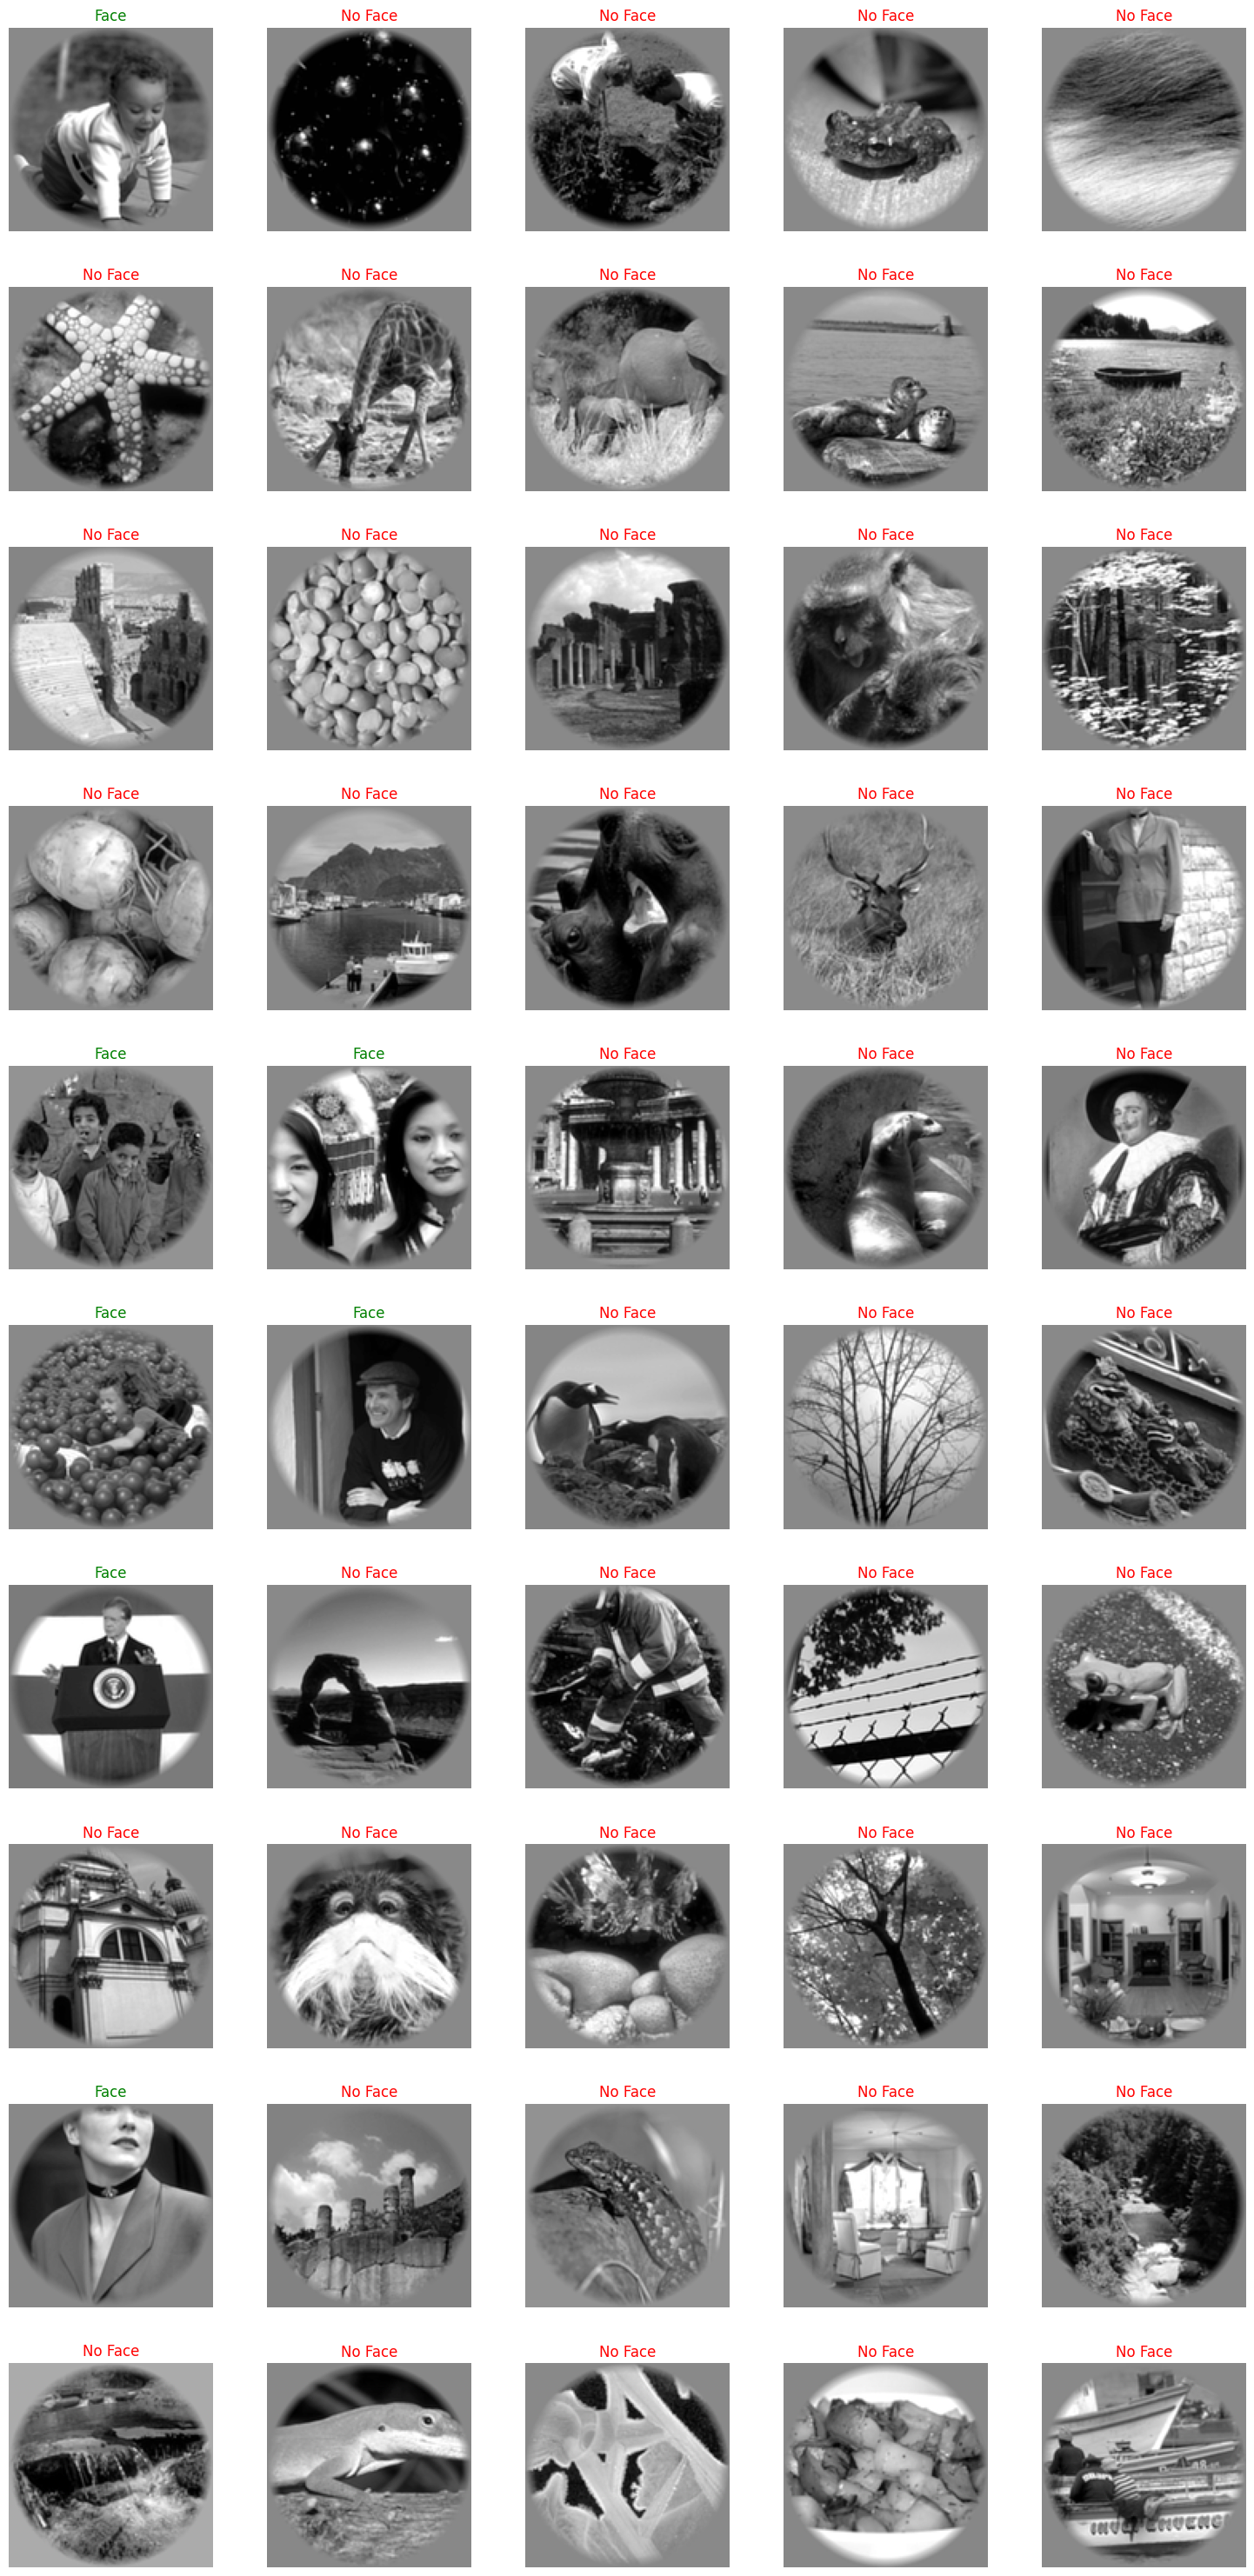

Number of images with faces: 7
Number of images without faces: 43


In [32]:
from retinaface import RetinaFace
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_faces(image):
    image_bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Adjust detection parameters for higher sensitivity
    faces = RetinaFace.detect_faces(image_bgr, threshold=0.9)

    print(f"Type of faces: {type(faces)}")
    print(f"Content of faces: {faces}")

    if isinstance(faces, dict):
        # Consider it a face if any detection has a score above the threshold
        for face in faces.values():
            if face['score'] > 0.9:  # Lower threshold for higher sensitivity
                return True
    return False

def process_images(X_train):
    results = []
    for i, image in enumerate(X_train):
        if image.dtype != np.uint8:
            image = (image * 255).astype(np.uint8)

        has_face = detect_faces(image)
        results.append(has_face)
        print(f"Image {i}: {'Face detected' if has_face else 'No face detected'}")
        if (i + 1) % 10 == 0:
            print(f"Processed {i + 1} images")

    return results

def plot_images_with_labels(images, labels, num_cols=5):
    num_images = len(images)
    num_rows = (num_images - 1) // num_cols + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*3, num_rows*3))
    fig.tight_layout()

    for i, (image, label) in enumerate(zip(images, labels)):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        ax.imshow(image, cmap='gray')
        ax.axis('off')
        ax.set_title('Face' if label else 'No Face', color='green' if label else 'red')

    for i in range(num_images, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        ax.axis('off')

    plt.show()

# Usage:
X_train_subset = X_train[:50]  # Using the first 50 images
face_detection_results = process_images(X_train_subset)

# Plot the results
plot_images_with_labels(X_train_subset, face_detection_results)

# Summary of results:
num_with_faces = sum(face_detection_results)
print(f"Number of images with faces: {num_with_faces}")
print(f"Number of images without faces: {len(face_detection_results) - num_with_faces}")

In [33]:
np.save("face_detection_results.npy", face_detection_results)

[True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]